# Cartography data from the Servicio Geológico Colombiano
The Sentinel 1 Level-1 Ground Range Detected (GRD) Data is taken from the platform [Planetary Computer](https://planetarycomputer.microsoft.com/explore)

Geology data taken from [Servicio Geológico Colombiano](https://srvags.sgc.gov.co/Flexviewer/Cartografia_Geocientifica/?page=Page)

The Colombia Geology Map is taken from [Colombia en Mapas](https://www.colombiaenmapas.gov.co/inicio/)

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import rioxarray
import geopandas as gpd
import pandas as pd
import zipfile
import fiona
import tempfile
import os
from pathlib import Path

import os
data_dir = os.path.abspath(os.path.join('..', 'data'))
output_dir = os.path.abspath(os.path.join('..', 'output'))

%matplotlib inline

## Cells in KMZ files

In [9]:
# Carpeta donde están los archivos .kmz
# carpeta_kmz = Path(r"C:\Users\jasolanoz\Documents\Detección_de_lineamientos_geológicos\data\pacifico_cartografia\kmz")
carpeta_kmz = Path(r"C:\Users\jasolanoz\Documents\Detección_de_lineamientos_geológicos\data\pacifico_cartografia_manual\KMZ")
# Crear una lista con todos los archivos KMZ
kmz_files = list(carpeta_kmz.glob("*.kmz"))

# Lista para guardar los GeoDataFrames
gdfs = []

for kmz_path in kmz_files:
    with tempfile.TemporaryDirectory() as tmpdir:
        # Extraer KMZ
        with zipfile.ZipFile(kmz_path, "r") as z:
            z.extractall(tmpdir)
        
        # Encontrar el archivo KML
        kml_files = list(Path(tmpdir).glob("*.kml"))
        if not kml_files:
            print(f"No se encontró .kml en {kmz_path}")
            continue

        kml_path = kml_files[0]

        # Obtener la lista de capas dentro del KML
        try:
            layers = fiona.listlayers(kml_path)
        except Exception as e:
            print(f"No se pudieron listar capas de {kml_path}: {e}")
            continue

        for layer in layers:
            try:
                gdf = gpd.read_file(kml_path, driver="KML", layer=layer)
                gdf["archivo_origen"] = kmz_path.stem
                gdf["capa_origen"] = layer
                gdfs.append(gdf)
                print(f"✔️ Leída capa '{layer}' de {kmz_path.name} ({len(gdf)} features)")
            except Exception as e:
                print(f"⚠️ Error leyendo capa {layer} de {kmz_path.name}: {e}")

# Unir todo en un solo GeoDataFrame
if gdfs:
    capas_d_gdb = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)
    print(f"\n✅ Se combinaron {len(gdfs)} capas de {len(kmz_files)} archivos")
    print(f"Total de {len(capas_d_gdb)} registros")
else:
    print("❌ No se generaron capas")

✔️ Leída capa 'Unidades Geológicas' de GeolPl100_ON_SIIG.kmz (10 features)
✔️ Leída capa 'Datos de medidas de estructuras' de GeolPl100_ON_SIIG.kmz (3 features)
✔️ Leída capa 'Fallas' de GeolPl100_ON_SIIG.kmz (8 features)
✔️ Leída capa 'Lineamientos' de GeolPl100_ON_SIIG.kmz (23 features)
✔️ Leída capa 'Pliegues' de GeolPl100_ON_SIIG.kmz (2 features)
✔️ Leída capa 'Contactos' de GeolPl100_ON_SIIG.kmz (23 features)
✔️ Leída capa 'Unidades Geológicas' de GeolPl101_ON_SIIG.kmz (26 features)
✔️ Leída capa 'Datos de medidas de estructuras' de GeolPl101_ON_SIIG.kmz (14 features)
✔️ Leída capa 'Fallas' de GeolPl101_ON_SIIG.kmz (8 features)
✔️ Leída capa 'Lineamientos' de GeolPl101_ON_SIIG.kmz (19 features)
✔️ Leída capa 'Pliegues' de GeolPl101_ON_SIIG.kmz (6 features)
✔️ Leída capa 'Contactos' de GeolPl101_ON_SIIG.kmz (61 features)
✔️ Leída capa 'Unidades Geológicas' de GeolPl102_ON_SIIG.kmz (36 features)
✔️ Leída capa 'Lineamientos' de GeolPl102_ON_SIIG.kmz (7 features)
✔️ Leída capa 'Fallas

In [10]:
capas_d_gdb

,id,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry,archivo_origen,capa_origen
0,None,GeolPl100: Composite,None,NaT,NaT,NaT,None,NaN,NaN,-1,NaN,files/Composite.png,None,"POLYGON Z ((-77.59037 7.52708 0, -77.59037 7.0...",GeolPl100_ON_SIIG,Unidades Geológicas
1,ID_00000,Unidades Geológicas,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,-1.0,0.0,-1,NaN,None,,"MULTIPOLYGON Z (((-77.66145 7.48955 0, -77.691...",GeolPl100_ON_SIIG,Unidades Geológicas
2,ID_00001,Unidades Geológicas,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,-1.0,0.0,-1,NaN,None,,"MULTIPOLYGON Z (((-77.66145 7.48955 0, -77.658...",GeolPl100_ON_SIIG,Unidades Geológicas
3,ID_00002,Unidades Geológicas,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,-1.0,0.0,-1,NaN,None,,"MULTIPOLYGON Z (((-77.73131 7.35514 0, -77.735...",GeolPl100_ON_SIIG,Unidades Geológicas
4,ID_00003,Unidades Geológicas,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,-1.0,0.0,-1,NaN,None,,"MULTIPOLYGON Z (((-77.69139 7.22451 0, -77.690...",GeolPl100_ON_SIIG,Unidades Geológicas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,ID_00046,Contactos,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,1.0,0.0,-1,NaN,None,,"MULTILINESTRING Z ((-77.07759 7.5489 0, -77.07...",GeolPl90_ON_SIIG,Contactos
9843,ID_00047,Contactos,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,1.0,0.0,-1,NaN,None,,"MULTILINESTRING Z ((-76.9822 7.48993 0, -76.97...",GeolPl90_ON_SIIG,Contactos
9844,ID_00048,Contactos,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,1.0,0.0,-1,NaN,None,,"MULTILINESTRING Z ((-76.93729 7.48992 0, -76.9...",GeolPl90_ON_SIIG,Contactos
9845,ID_00049,Contactos,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaT,NaT,NaT,None,1.0,0.0,-1,NaN,None,,"MULTILINESTRING Z ((-76.84361 7.48988 0, -76.8...",GeolPl90_ON_SIIG,Contactos


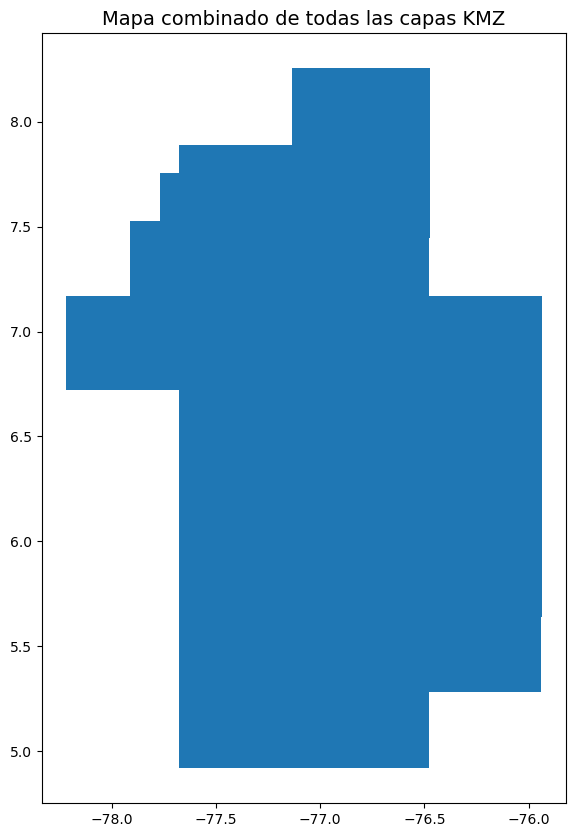

In [13]:
import matplotlib.pyplot as plt
capas_d_gdb.plot(figsize=(12, 10))
plt.title("Mapa combinado de todas las capas KMZ", fontsize=14)
plt.show()

### Get structures

In [14]:
capas_d_gdb = capas_d_gdb[capas_d_gdb.geom_type.isin(["LineString", "MultiLineString"])]

lineamientos = capas_d_gdb[capas_d_gdb["capa_origen"].str.contains("Lineamientos", case=False, na=False)]
fallas = capas_d_gdb[capas_d_gdb["capa_origen"].str.contains("Fallas", case=False, na=False)]
pliegues = capas_d_gdb[capas_d_gdb["capa_origen"].str.contains("Pliegues", case=False, na=False)]
contactos = capas_d_gdb[capas_d_gdb["capa_origen"].str.contains("Contactos", case=False, na=False)]
lineamientos = lineamientos.to_crs(epsg=4326)
fallas = fallas.to_crs(epsg=4326)
pliegues = pliegues.to_crs(epsg=4326)
contactos = contactos.to_crs(epsg=4326)

### On SAR data

In [15]:
filename = output_dir + '/raster/' + 'sentinel-1_GRD_VH_masked_spk.tif'
# filename = output_dir + '/raster/' + 'BOU_masked.tif'
SAR = rioxarray.open_rasterio(filename)
# region = (-78, -77, 7.9, 6.7)
# SAR_subsampled = SAR.sel(x=slice(*region[:2]), y=slice(*region[2:]))
sampling = 5
SAR_sampled = SAR.isel(x=slice(None, None, sampling), y=slice(None, None, sampling))

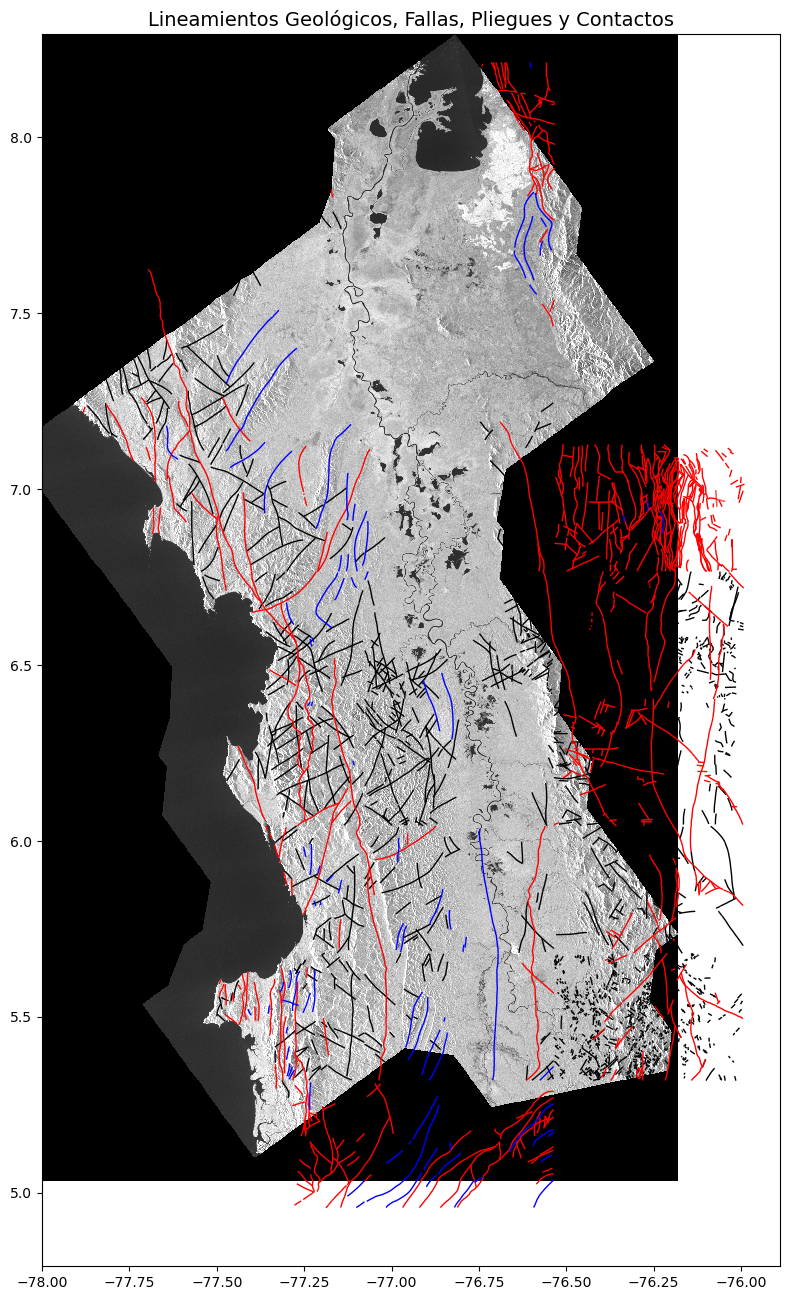

In [16]:
fig, ax = plt.subplots(figsize=(10, 16))
im = ax.pcolormesh(SAR_sampled.x, SAR_sampled.y, SAR_sampled[0], cmap='gray', vmax=150)
lineamientos.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)
fallas.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1)
pliegues.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1)
# contactos.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=1)
# plt.xlim(-78, -77)
# plt.ylim(6.7, 7.9)
plt.title("Lineamientos Geológicos, Fallas, Pliegues y Contactos", fontsize=14)
plt.show()

### To GeoDataFrame

In [11]:
gdf = gpd.GeoDataFrame(pd.concat([
    lineamientos.assign(tipo="lineamiento"),
    fallas.assign(tipo="falla"),
    pliegues.assign(tipo="pliegue"),
    # contactos.assign(tipo="contacto")
], ignore_index=True), crs="EPSG:4326")

In [13]:
gdf.to_file(os.path.join(output_dir, "vector", "pacifico_structures.geojson"), driver="GeoJSON")

## Geology Map from Colombia en Mapas

In [17]:
import geopandas as gpd
gdf = gpd.read_file(r"..\data\vector\geoColombia\Mapa_Geol%C3%B3gico_de_Colombia_2015._Escala_1%3A1.000.000.shp")
gdf

,OBJECTID,Tipo,NombreFall,Comentario,GlobalID,Shape__Len,geometry
0,13687,Falla,None,None,525f310a-5944-4c95-b958-c91e6d6f4d27,0.139363,"LINESTRING (-72.89873 6.34496, -72.89316 6.344..."
1,13690,Falla,Falla de Chaguaca,None,ac1c2068-f814-4261-96f1-07511a569a35,0.013992,"LINESTRING (-72.77309 6.17363, -72.77141 6.165..."
2,13691,Falla,Falla de Chaguaca,None,07eeeda1-ec6d-4b89-839e-6c6e446000b4,0.157835,"LINESTRING (-72.81564 5.98508, -72.81506 5.986..."
3,13692,Falla inversa o de cabalgamiento,Falla de Soápaga,None,14dbf299-4126-4d94-b6ca-902c97ad5a27,0.084160,"LINESTRING (-72.71945 6.11084, -72.71961 6.104..."
4,13693,Falla cubierta,Falla de Soápaga,None,3320158f-fc99-47f7-b9c2-4eb4986905b4,0.031333,"LINESTRING (-72.66563 6.1713, -72.6676 6.16892..."
...,...,...,...,...,...,...,...
4861,23921,Falla,None,None,fb1a8c85-7d7e-404c-8b2f-21cbe65cd65c,0.023447,"LINESTRING (-73.37392 4.36841, -73.37463 4.360..."
4862,23922,Falla inversa o de cabalgamiento,None,None,ac659b84-1188-4b63-9b50-7953cd7a6baa,0.073274,"LINESTRING (-72.68795 5.00243, -72.69093 4.997..."
4863,23923,Falla inversa o de cabalgamiento cubierta,None,None,c197b7f7-ecc4-4b36-b79c-cec5ecdf55fd,0.007457,"LINESTRING (-72.72966 4.94265, -72.73032 4.941..."
4864,23924,Falla,None,None,7a8ca6f2-2506-41fc-850f-60f824d3c07a,0.009036,"LINESTRING (-73.52957 4.3542, -73.53181 4.3563..."


<Axes: >

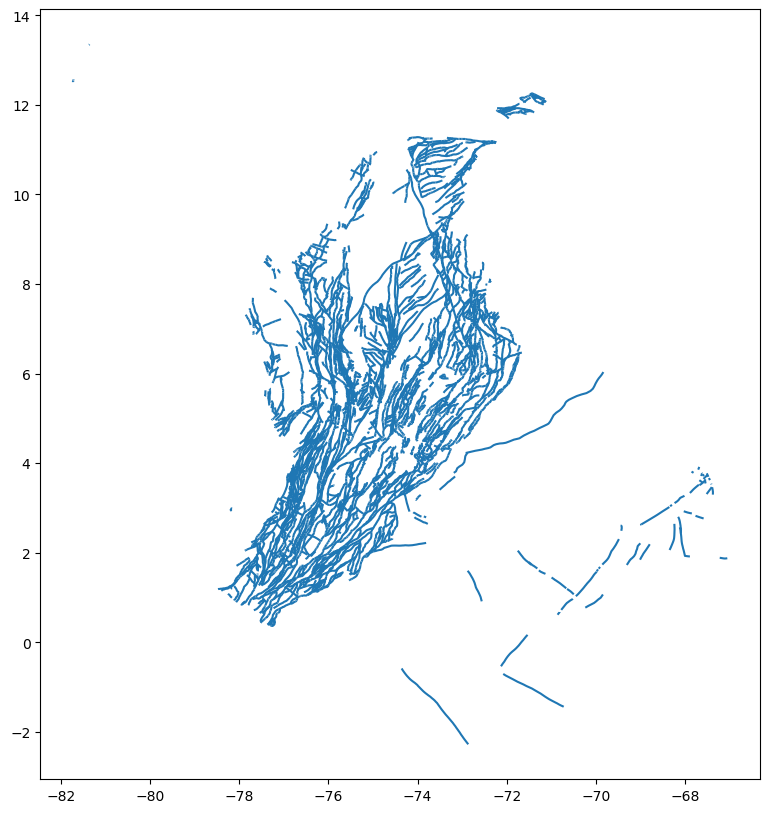

In [18]:
gdf.plot(figsize=(10,10))